In [1]:
### Base ###
import os
import numpy as np 
import torch 
import torch.nn as nn
from torch.optim import Adam
import fnmatch
from torch.utils.data import TensorDataset, DataLoader
import itertools
import math
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter
import PIL.Image as pimg

### Visualization ###
#import seaborn as sns
#sns.set(color_codes=True)
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
rc('font', **{'family':'serif','serif':['Palatino']})

40.36492651796569 40.36492651796569


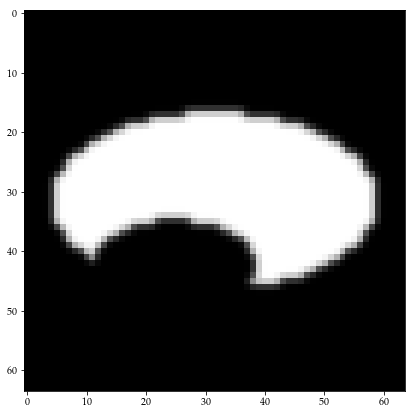

In [2]:
img_size = 64

dx = 0.7
dy = 1.3
# dx = 1.
# dy = 1.

brain_r = 30
tumour_r = 15

tumour_pr = 20.
# for t in [0.0, 0.25, 0.5, 0.75, 1., 1.25, 1.5, 1.75, 2.0]:
tumour_pt = 0.66 * math.pi

tumour_x = 50. + tumour_pr * math.cos(tumour_pt)
tumour_y = 50. + tumour_pr * math.sin(tumour_pt)
print(tumour_x, tumour_x)

tumour_c = 0.

sigma = 1.0

img = np.zeros((img_size, img_size))
coordinates_x, coordinates_y = np.meshgrid(np.arange(1, img_size + 1), np.arange(1, img_size + 1))

center = (img_size + 1.) / 2.0
img[((coordinates_x - center) ** 2) / (brain_r / dx * img_size / 100.) ** 2 + ((coordinates_y - center) ** 2) / (brain_r / dy * img_size / 100.) ** 2 <= 1.] = 1.0
img[((coordinates_x - tumour_x * img_size / 100.) ** 2) / (tumour_r / dx * img_size / 100.) ** 2 + ((coordinates_y - tumour_y * img_size / 100.) ** 2) / (tumour_r / dy * img_size / 100.) ** 2 <= 1.] = tumour_c
img = gaussian_filter(img, sigma * img_size / 100.)

figsize = 7
f = plt.figure(figsize=(figsize, figsize))
plt.imshow(img, cmap='gray')
# plt.scatter(center, center)
plt.show()

In [3]:
np.linspace(0.75, 1.25, 11, endpoint=True), np.linspace(0.725, 1.275, 12, endpoint=True)

(array([0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25]),
 array([0.725, 0.775, 0.825, 0.875, 0.925, 0.975, 1.025, 1.075, 1.125,
        1.175, 1.225, 1.275]))

In [4]:
np.linspace(0.75, 1.25, 6, endpoint=True), np.linspace(0.7, 1.3, 7, endpoint=True)

(array([0.75, 0.85, 0.95, 1.05, 1.15, 1.25]),
 array([0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3]))

In [5]:
np.linspace(0.05, 0.95, 10, endpoint=True), np.linspace(0., 1., 10, endpoint=False)

(array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

In [12]:
np.linspace(0.0, 1.0, 6, endpoint=False), np.linspace(1./12., 1.+1./12., 6, endpoint=False)

(array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333]),
 array([0.08333333, 0.25      , 0.41666667, 0.58333333, 0.75      ,
        0.91666667]))

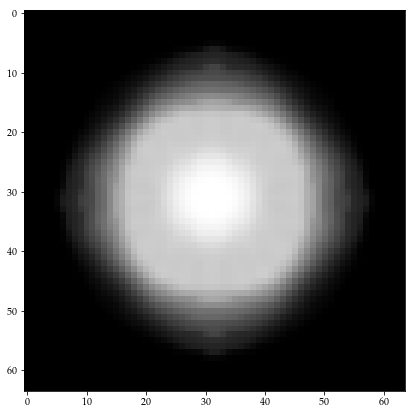

In [6]:
# Generate data

# TRAIN
path_to_folder = '/Users/alexandre.bone/Softwares/deepshape/examples/eyes/data/train_NEWW'

if not os.path.isdir(path_to_folder):
    os.mkdir(path_to_folder)

img_size = 64
center = (img_size + 1.) / 2.0
    
average = np.zeros((img_size, img_size))

k = 0
for dx in np.linspace(0.75, 1.25, 6, endpoint=True): 
    for dy in np.linspace(0.75, 1.25, 6, endpoint=True): 
        for pt in np.linspace(0.05, 0.95, 10, endpoint=True): 

            brain_r = 30
            tumour_r = 15

            tumour_pr = 25.
            tumour_pt = pt * 2. * math.pi

            tumour_x = 50. + tumour_pr * math.cos(tumour_pt)
            tumour_y = 50. + tumour_pr * math.sin(tumour_pt)

            tumour_c = 0.

            sigma = 1.0

            img = np.zeros((img_size, img_size))
            coordinates_x, coordinates_y = np.meshgrid(np.arange(1, img_size + 1), np.arange(1, img_size + 1))

            center = (img_size + 1.) / 2.0
            img[((coordinates_x - center) ** 2) / (brain_r / dx * img_size / 100.) ** 2 + ((coordinates_y - center) ** 2) / (brain_r / dy * img_size / 100.) ** 2 <= 1.] = 1.0
            img[((coordinates_x - tumour_x * img_size / 100.) ** 2) / (tumour_r / dx * img_size / 100.) ** 2 + ((coordinates_y - tumour_y * img_size / 100.) ** 2) / (tumour_r / dy * img_size / 100.) ** 2 <= 1.] = tumour_c
            img = gaussian_filter(img, sigma * img_size / 100.)

            tol = 1e-10
            img = (np.clip(img, tol, 1.0 - tol) * 255).astype('uint8')
            pimg.fromarray(img).save(os.path.join(path_to_folder, 'eye__%d.png' % k))

            average += img
            k += 1
average /= float(k)

figsize = 7
f = plt.figure(figsize=(figsize, figsize))
plt.imshow(average, cmap='gray')
plt.show()

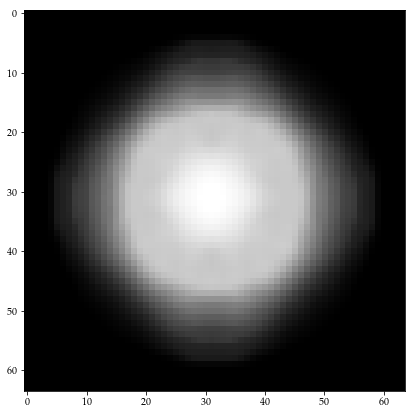

In [7]:
# Generate data

# TEST
path_to_folder = '/Users/alexandre.bone/Softwares/deepshape/examples/eyes/data/test_NEWW'

if not os.path.isdir(path_to_folder):
    os.mkdir(path_to_folder)

img_size = 64
center = (img_size + 1.) / 2.0
    
average = np.zeros((img_size, img_size))

k = 0
for dx in np.linspace(0.7, 1.3, 7, endpoint=True): 
    for dy in np.linspace(0.7, 1.3, 7, endpoint=True): 
        for pt in np.linspace(0., 1., 10, endpoint=False): 

            brain_r = 30
            tumour_r = 15

            tumour_pr = 25.
            tumour_pt = pt * 2. * math.pi

            tumour_x = 50. + tumour_pr * math.cos(tumour_pt)
            tumour_y = 50. + tumour_pr * math.sin(tumour_pt)

            tumour_c = 0.

            sigma = 1.0

            img = np.zeros((img_size, img_size))
            coordinates_x, coordinates_y = np.meshgrid(np.arange(1, img_size + 1), np.arange(1, img_size + 1))

            center = (img_size + 1.) / 2.0
            img[((coordinates_x - center) ** 2) / (brain_r / dx * img_size / 100.) ** 2 + ((coordinates_y - center) ** 2) / (brain_r / dy * img_size / 100.) ** 2 <= 1.] = 1.0
            img[((coordinates_x - tumour_x * img_size / 100.) ** 2) / (tumour_r / dx * img_size / 100.) ** 2 + ((coordinates_y - tumour_y * img_size / 100.) ** 2) / (tumour_r / dy * img_size / 100.) ** 2 <= 1.] = tumour_c
            img = gaussian_filter(img, sigma * img_size / 100.)

            tol = 1e-10
            img = (np.clip(img, tol, 1.0 - tol) * 255).astype('uint8')
            pimg.fromarray(img).save(os.path.join(path_to_folder, 'eye__%d.png' % k))

            average += img
            k += 1
average /= float(k)

figsize = 7
f = plt.figure(figsize=(figsize, figsize))
plt.imshow(average, cmap='gray')
plt.show()